<a href="https://colab.research.google.com/github/dukeahmadi/dukeahmadi/blob/main/206prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv('/content/peugeot-206.csv')

In [ ]:
df.head(50)

,Year,Kilometers,Model,Name,Price
0,1390,336000,تیپ 5,پژو 206,320000000
1,1392,240000,تیپ 5,پژو 206,395000000
2,1395,91000,تیپ 5,پژو 206,450000000
3,1394,73000,تیپ 5,پژو 206,400000000
4,1401,0,تیپ 3 پانوراما,پژو 206,600000000
5,1395,135000,تیپ 2,پژو 206,370000000
6,1399,66000,تیپ 2,پژو 206,475000000
7,1396,169000,تیپ 5,پژو 206,450000000
8,1380,368000,تیپ 1,پژو 206,225000000
9,1399,560000,تیپ 2,پژو 206,475000000


In [ ]:

df['Model'] = df['Model'].str.replace('تیپ', '', regex=False)


print(df['Model'])


0                 5
1                 5
2                 5
3                 5
4        3 پانوراما
           ...     
1235              5
1236              2
1237              2
1238              2
1239              2
Name: Model, Length: 1240, dtype: object


In [ ]:
# Create a new column to check for the word "panorama"
df['has_panorama'] = df['Model'].str.contains('پانوراما')

print(df[['Model', 'has_panorama']])

            Model  has_panorama
0               5         False
1               5         False
2               5         False
3               5         False
4      3 پانوراما          True
...           ...           ...
1235            5         False
1236            2         False
1237            2         False
1238            2         False
1239            2         False

[1240 rows x 2 columns]


In [ ]:
# Removing the word "panorama" from the main column
df['Model'] = df['Model'].str.replace('پانوراما', '', regex=False)

print(df['Model'])


0         5
1         5
2         5
3         5
4        3 
       ... 
1235      5
1236      2
1237      2
1238      2
1239      2
Name: Model, Length: 1240, dtype: object


In [ ]:
print(df.isnull().sum())

Year            0
Kilometers      0
Model           0
Name            0
Price           0
has_panorama    0
dtype: int64


In [ ]:
df.head()

,Year,Kilometers,Model,Name,Price,has_panorama
0,1390,336000,5,پژو 206,320000000,False
1,1392,240000,5,پژو 206,395000000,False
2,1395,91000,5,پژو 206,450000000,False
3,1394,73000,5,پژو 206,400000000,False
4,1401,0,3,پژو 206,600000000,True


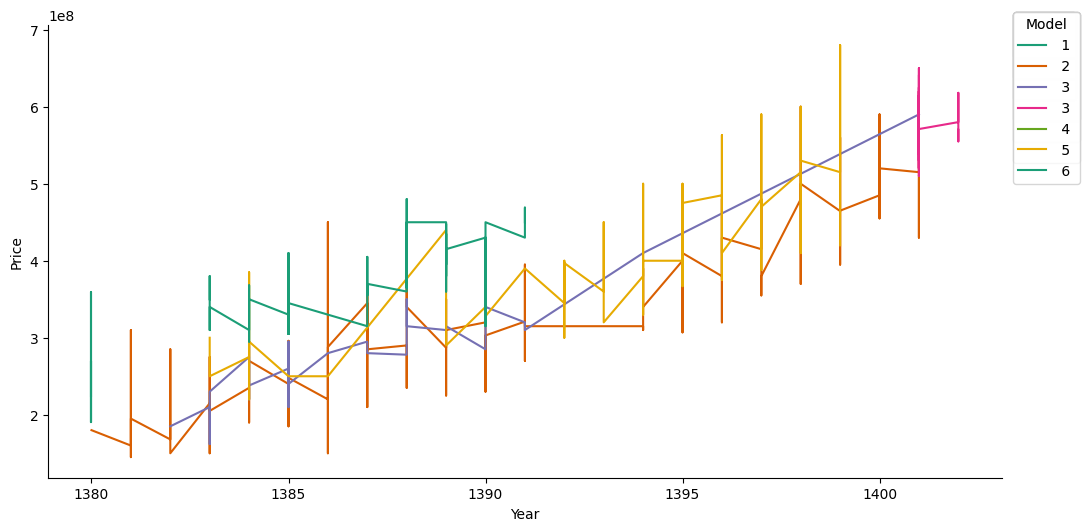

In [ ]:
# @title Year vs Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Price')

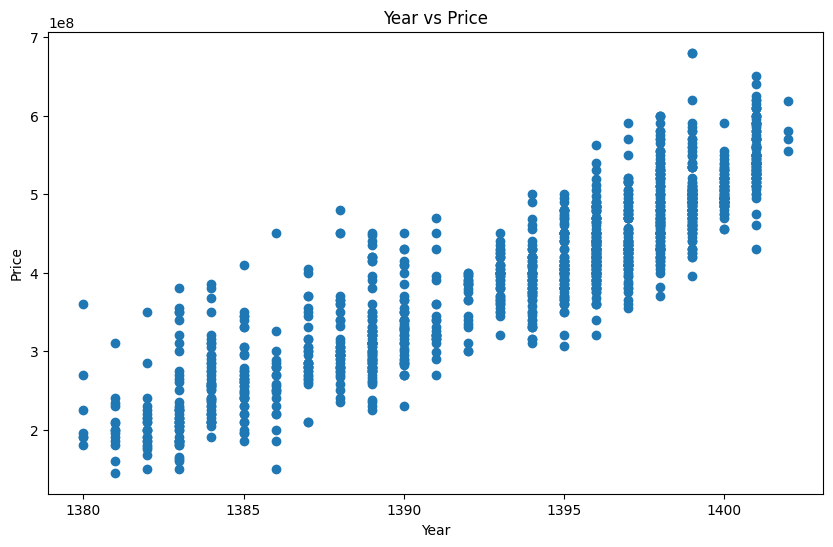

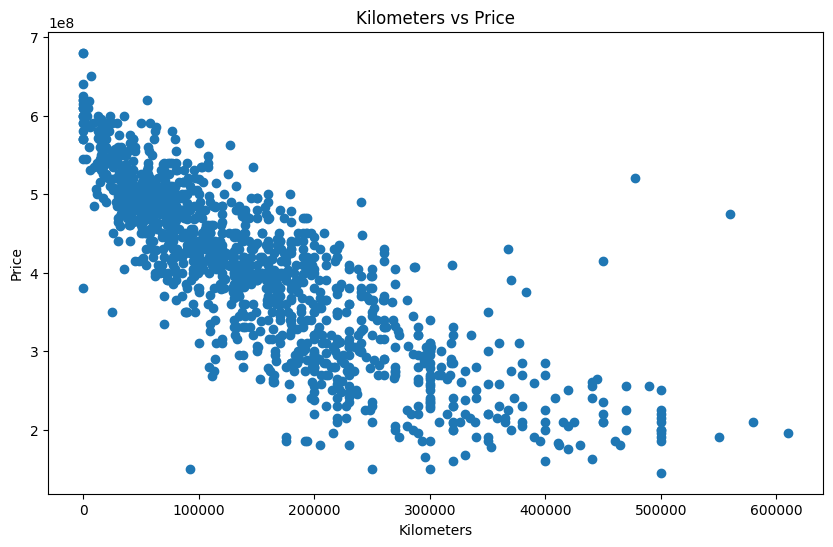

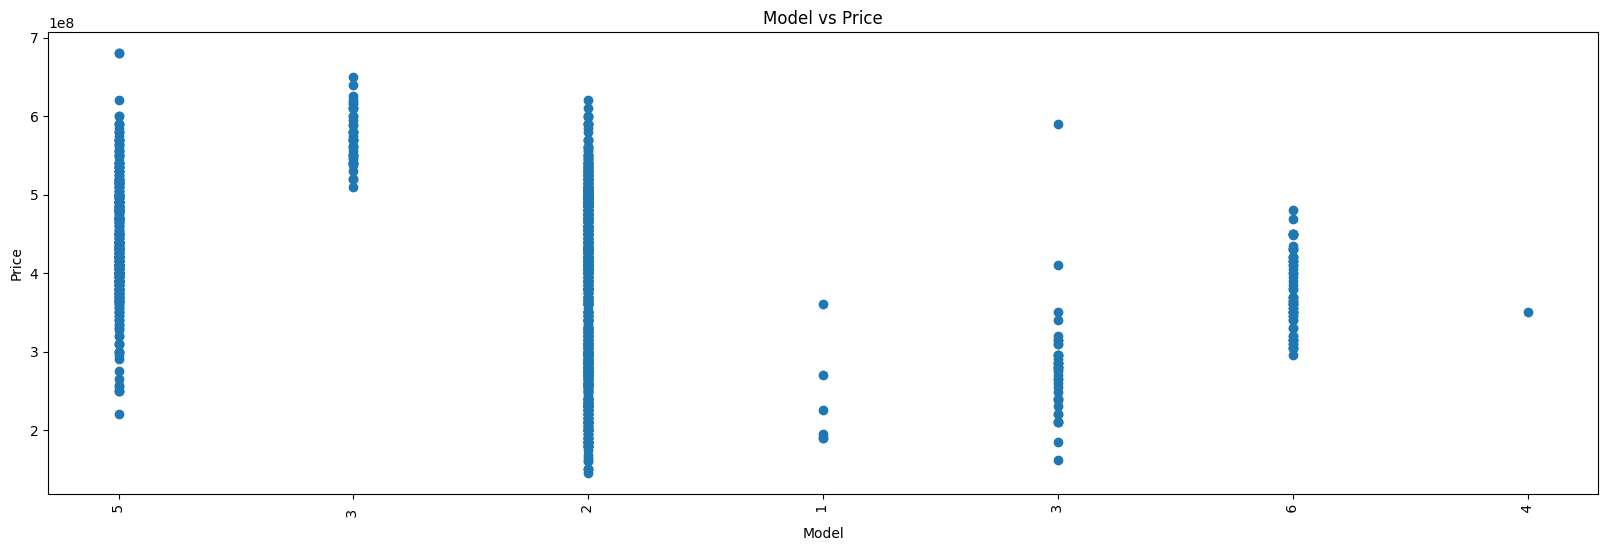

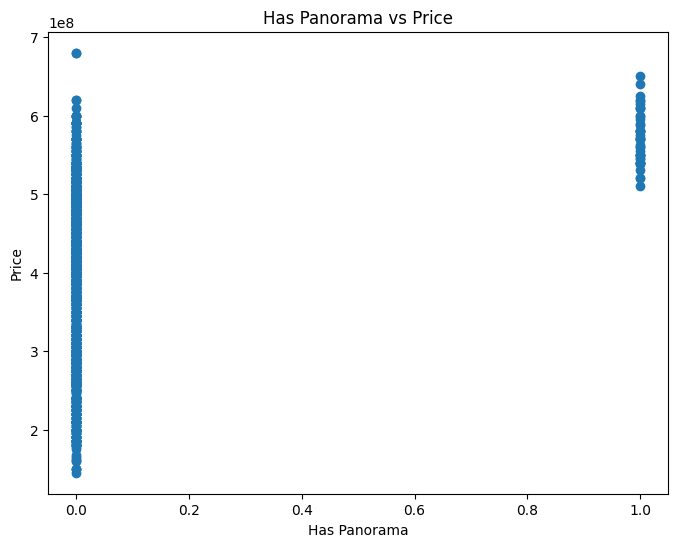

In [ ]:
# plot Year vs Price , Kilometers vs Price , Model vs Price , has_panorama vs Price

import matplotlib.pyplot as plt

# Year vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()

# Kilometers vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Kilometers'], df['Price'])
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.title('Kilometers vs Price')
plt.show()

# Model vs Price (This might be less informative due to many unique models)
plt.figure(figsize=(20, 6))
plt.scatter(df['Model'], df['Price'])
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model vs Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# has_panorama vs Price
plt.figure(figsize=(8, 6))
plt.scatter(df['has_panorama'], df['Price'])
plt.xlabel('Has Panorama')
plt.ylabel('Price')
plt.title('Has Panorama vs Price')
plt.show()


In [ ]:
Features = ['Year', 'Kilometers', 'Model','has_panorama']
X = df[Features]

Y = df.Price

In [ ]:
from sklearn.model_selection import train_test_split

X_train ,X_test , Y_train , Y_test = train_test_split(X ,Y ,train_size = 0.7 , random_state = 20)

X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((868, 4), (868,), (372, 4), (372,))

In [ ]:
# Creating a Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


model = LinearRegression()
model.fit(X_train, Y_train)

# price forecasting
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(Y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 29018042.39049578


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creating a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(Y_test, y_pred_rf)
print(f'Mean Absolute Error (Random Forest): {mae_rf}')


Mean Absolute Error (Random Forest): 25699143.736938093


In [ ]:
# Identifying Text Columns

from xgboost import XGBRegressor


for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')


xgb_model = XGBRegressor(n_estimators=100, random_state=42, enable_categorical=True)
xgb_model.fit(X_train, Y_train)


y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(Y_test, y_pred_xgb)
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')


Mean Absolute Error (XGBoost): 32758846.70967742


In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Show the importance of features
for feature, importance in feature_importance:
    print(f'{feature}: {importance}')


Year: 0.7943450212712468
Kilometers: 0.13197519704371125
Model: 0.07337674962542724
has_panorama: 0.0003030320596146049


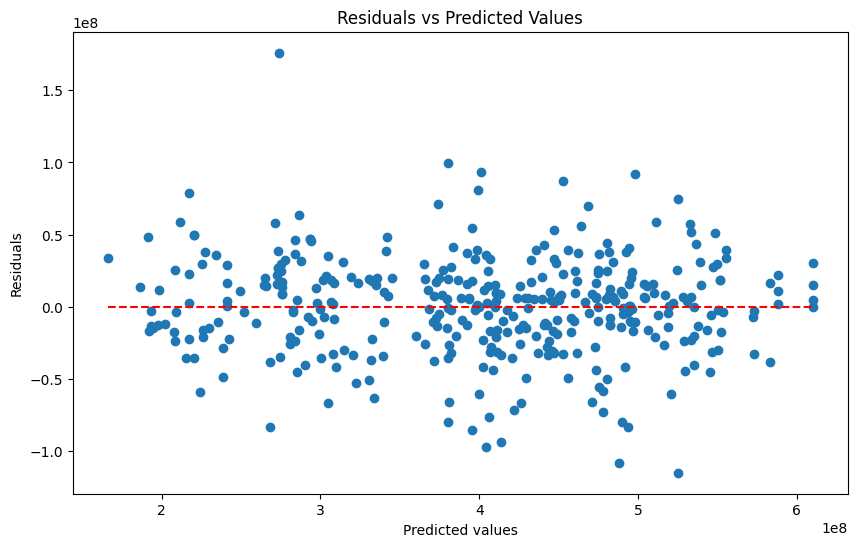

In [ ]:
#Residuals to identify specific patterns and assess whether the model distributes prediction errors well.


residuals = Y_test - y_pred_rf
plt.figure(figsize=(10,6))
plt.scatter(y_pred_rf, residuals)
plt.hlines(y=0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), colors='r', linestyles='dashed')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE: {-scores.mean()}')


Cross-validated MAE: 25427284.194680847


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Defining Parameters

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Creating a Model
model = RandomForestRegressor()

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best MAE:", grid_search.best_score_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best MAE: 0.9119377295626221


In [ ]:
# Build the model with the best parameters
best_params = {
    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'log2',
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 200
}

model = RandomForestRegressor(**best_params)


model.fit(X_train, Y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(Y_test, y_pred)

print("Mean Absolute Error with Best Model:", mae)

Mean Absolute Error with Best Model: 24168341.604854275


In [ ]:
test = pd.read_csv('/content/206_test.csv')

In [ ]:
test.head(50)

,Year,Kilometers,Model,has_panorama
0,1401,0,2,False
1,1396,33000,2,False
2,1397,211000,2,False
3,1396,116000,5,False
4,1401,5000,3,True
5,1401,60000,2,False
6,1400,40000,3,False
7,1395,148000,5,False
8,1389,112760,6,False
9,1398,132000,2,False


In [ ]:
del test['Name']

In [ ]:
X_TEST = test[:1]

In [ ]:

y_predt = model.predict(X_TEST)

In [ ]:
y_predt

array([5.86328027e+08])

In [ ]:
X_TEST2 = test[1:2]


In [ ]:
y_pred2 = model.predict(X_TEST2)

In [ ]:
y_pred2

array([4.50882142e+08])

In [ ]:
X_TEST41 = test[40:41]


In [ ]:
y_pred41 = model.predict(X_TEST41)

In [ ]:
y_pred41

array([3.78665846e+08])